<a href="https://colab.research.google.com/github/charlie-51135/Intro-to-ML/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Problem 1: SVM classifier for cancer dataset**


K = 1
Confusion matrix:
 [[62  3]
 [ 7 42]]
Accuracy: 0.9122807017543859
Precision: 0.9333333333333333
Recall: 0.8571428571428571
F1 Score: 0.8936170212765957

K = 2
Confusion matrix:
 [[62  3]
 [ 4 45]]
Accuracy: 0.9385964912280702
Precision: 0.9375
Recall: 0.9183673469387755
F1 Score: 0.9278350515463918

K = 3
Confusion matrix:
 [[63  2]
 [ 2 47]]
Accuracy: 0.9649122807017544
Precision: 0.9591836734693877
Recall: 0.9591836734693877
F1 Score: 0.9591836734693877

K = 4
Confusion matrix:
 [[63  2]
 [ 3 46]]
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.9387755102040817
F1 Score: 0.9484536082474228

K = 5
Confusion matrix:
 [[64  1]
 [ 3 46]]
Accuracy: 0.9649122807017544
Precision: 0.9787234042553191
Recall: 0.9387755102040817
F1 Score: 0.9583333333333333

K = 6
Confusion matrix:
 [[63  2]
 [ 3 46]]
Accuracy: 0.956140350877193
Precision: 0.9583333333333334
Recall: 0.9387755102040817
F1 Score: 0.9484536082474228

K = 7
Confusion matrix:
 [[64  1]
 [ 4 45]]
Accuracy:

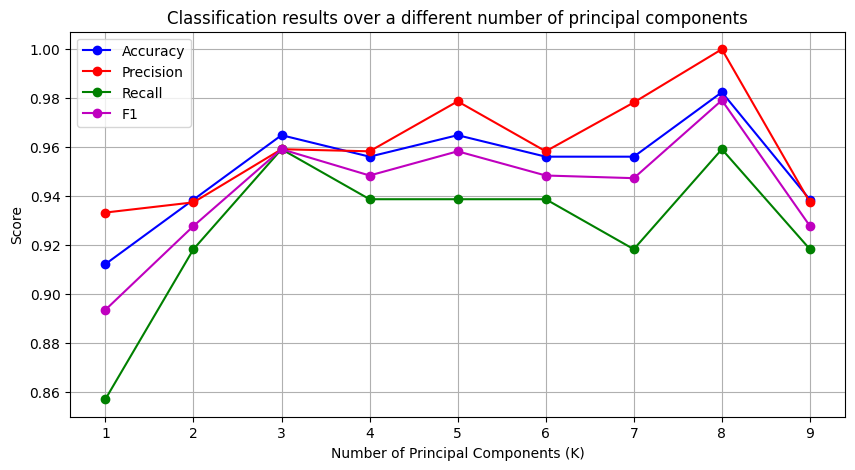

In [135]:
file_path = '/content/drive/MyDrive/Intro-to-ML/cancer.csv'
cancer = pd.read_csv(file_path)
# Check for null values
#print(cancer.isnull().sum()*100/cancer.shape[0])
cancer = cancer.drop(columns=['Unnamed: 32', 'id'])

# Split training and test data
df_train, df_test = train_test_split(cancer, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train = df_train.pop('diagnosis')
X_train_orig = df_train
y_val = df_test.pop('diagnosis')
X_val_orig = df_test

# Apply scaler() to all the columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_orig)
X_val = scaler.transform(X_val_orig)

accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for k in range(1, 10):
    # Run PCA for k components
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)

    # Run Linear Support vector classifier
    clf = SVC(kernel='linear', C=1000)
    clf.fit(X_train_pca, y_train)

    # Make predictions
    y_pred = clf.predict(X_val_pca)

    # Get confusion matrix
    cnf_matrix = confusion_matrix(y_val, y_pred)

    # Find accuracy, precision, recall and F1 score
    accuracy = metrics.accuracy_score(y_val, y_pred)
    precision = metrics.precision_score(y_val, y_pred, pos_label='M')
    recall = metrics.recall_score(y_val, y_pred, pos_label='M')
    f1 = (2*precision*recall)/(precision+recall) if (precision+recall) != 0 else 0

    # Store and display the metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    print("\nK =", k)
    print("Confusion matrix:\n", cnf_matrix)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

# Graph the metrics
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), accuracy_list, marker='o', linestyle='-', color='b', label='Accuracy')
plt.plot(range(1, 10), precision_list, marker='o', linestyle='-', color='r', label='Precision')
plt.plot(range(1, 10), recall_list, marker='o', linestyle='-', color='g', label='Recall')
plt.plot(range(1, 10), f1_list, marker='o', linestyle='-', color='m', label='F1')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Classification results over a different number of principal components')
plt.legend()
plt.grid(True)
plt.show()

# **Problem 1: Different kernels**

PCA Components: 1, Kernel: linear, 	Accuracy: 0.9122807017543859
PCA Components: 1, Kernel: poly, 	Accuracy: 0.8859649122807017
PCA Components: 1, Kernel: rbf, 	Accuracy: 0.9122807017543859
PCA Components: 1, Kernel: sigmoid, 	Accuracy: 0.8771929824561403
PCA Components: 2, Kernel: linear, 	Accuracy: 0.9385964912280702
PCA Components: 2, Kernel: poly, 	Accuracy: 0.9210526315789473
PCA Components: 2, Kernel: rbf, 	Accuracy: 0.9298245614035088
PCA Components: 2, Kernel: sigmoid, 	Accuracy: 0.8859649122807017
PCA Components: 3, Kernel: linear, 	Accuracy: 0.9649122807017544
PCA Components: 3, Kernel: poly, 	Accuracy: 0.9210526315789473
PCA Components: 3, Kernel: rbf, 	Accuracy: 0.9298245614035088
PCA Components: 3, Kernel: sigmoid, 	Accuracy: 0.8859649122807017
PCA Components: 4, Kernel: linear, 	Accuracy: 0.956140350877193
PCA Components: 4, Kernel: poly, 	Accuracy: 0.9210526315789473
PCA Components: 4, Kernel: rbf, 	Accuracy: 0.9473684210526315
PCA Components: 4, Kernel: sigmoid, 	Accura

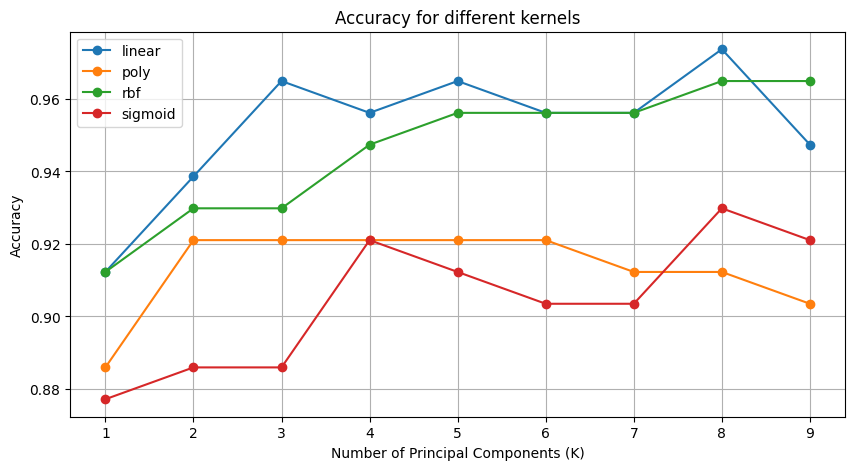

In [136]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for k in range(1, 10):
    # Run PCA for k components
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)

    # Run for each kernel
    for kernel in kernels:
        clf = SVC(kernel=kernel, C=1)
        clf.fit(X_train_pca, y_train)
        y_pred = clf.predict(X_val_pca)
        accuracy = metrics.accuracy_score(y_val, y_pred)

        # Store the results
        results.append({
            'PCA Components': k,
            'Kernel': kernel,
            'Accuracy': accuracy
        })

        print(f"PCA Components: {k}, Kernel: {kernel}, \tAccuracy: {accuracy}")

# Plot the results
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
for kernel in kernels:
    subset = results_df[results_df['Kernel'] == kernel]
    plt.plot(subset['PCA Components'], subset['Accuracy'], marker='o', linestyle='-', label=kernel)
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy for different kernels')
plt.legend()
plt.grid(True)
plt.show()

# **Problem 1: Best result**


K = 8
Confusion matrix:
 [[65  0]
 [ 2 47]]
Accuracy: 0.9824561403508771
Precision: 1.0
Recall: 0.9591836734693877
F1 Score: 0.9791666666666666


Text(0.5, 427.9555555555555, 'Predicted label')

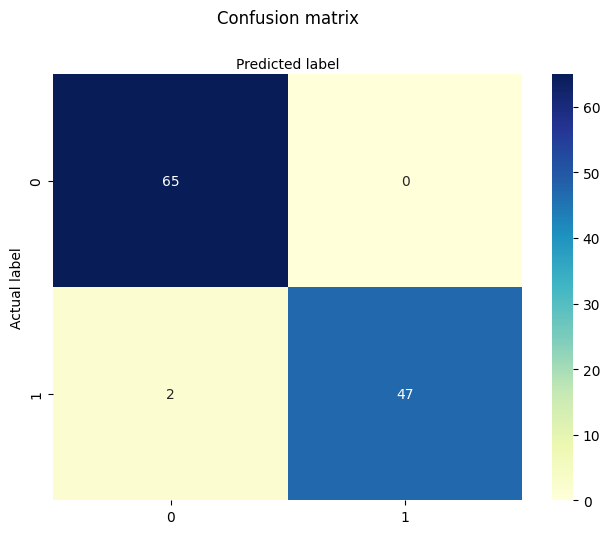

In [137]:
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

clf = SVC(kernel='linear', C=1000)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_val_pca)

# Get confusion matrix
cnf_matrix = confusion_matrix(y_val, y_pred)

# Find accuracy, precision, recall and F1 score
accuracy = metrics.accuracy_score(y_val, y_pred)
precision = metrics.precision_score(y_val, y_pred, pos_label='M')
recall = metrics.recall_score(y_val, y_pred, pos_label='M')
f1 = (2*precision*recall)/(precision+recall) if (precision+recall) != 0 else 0

# Store and display the metrics
accuracy_list.append(accuracy)
precision_list.append(precision)
recall_list.append(recall)
f1_list.append(f1)
print("\nK = 8")
print("Confusion matrix:\n", cnf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion matrix using heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Problem 2: SVR regression for housing dataset**

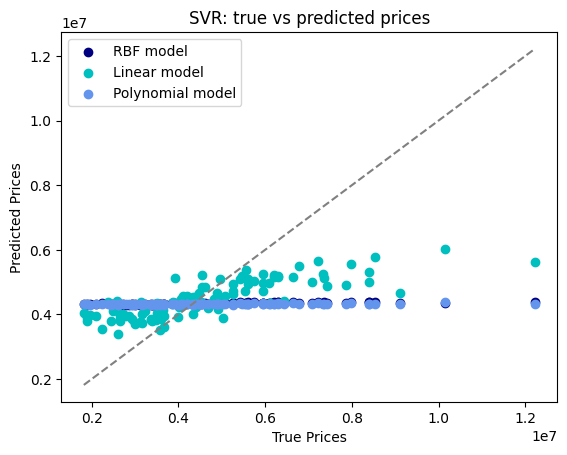

RMSE for RBF: 1886217.036865891
RMSE for Linear: 1454106.533895362
RMSE for Polynomial: 1899957.8749675034


In [138]:
file_path = '/content/drive/MyDrive/Intro-to-ML/Housing.csv'
housing = pd.read_csv(file_path)
# Check for null values
#housing.isnull().sum()*100/housing.shape[0]

# Replace yes/no data
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(binary_map)

# Split training and test data
input_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
y_train = df_train.pop('price')
X_train = df_train[input_vars]
y_val = df_test.pop('price')
X_val = df_test[input_vars]

# Apply standard scalar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X_train, y_train).predict(X_val)
y_lin = svr_lin.fit(X_train, y_train).predict(X_val)
y_poly = svr_poly.fit(X_train, y_train).predict(X_val)

# Show results
plt.scatter(y_val, y_rbf, color='navy', label='RBF model')
plt.scatter(y_val, y_lin, color='c', label='Linear model')
plt.scatter(y_val, y_poly, color='cornflowerblue', label='Polynomial model')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='gray')  # Perfect prediction
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('SVR: true vs predicted prices')
plt.legend()
plt.show()

print("RMSE for RBF:", np.sqrt(mean_squared_error(y_val, y_rbf)))
print("RMSE for Linear:", np.sqrt(mean_squared_error(y_val, y_lin)))
print("RMSE for Polynomial:", np.sqrt(mean_squared_error(y_val, y_poly)))


For 1 PCA components:
RMSE for RBF: 1859822.476435972
RMSE for Linear: 1449646.1444978616
RMSE for Polynomial: 1465087.1612752348

For 2 PCA components:
RMSE for RBF: 1886069.3629623365
RMSE for Linear: 1452989.6717078565
RMSE for Polynomial: 1370428.9874966652

For 3 PCA components:
RMSE for RBF: 1895507.4906204883
RMSE for Linear: 1452786.141860284
RMSE for Polynomial: 1389125.302977697

For 4 PCA components:
RMSE for RBF: 1897574.8782811374
RMSE for Linear: 1452749.636756981
RMSE for Polynomial: 1352070.8308922902

For 5 PCA components:
RMSE for RBF: 1900092.0826794007
RMSE for Linear: 1450925.8306353276
RMSE for Polynomial: 1297425.6583174383

For 6 PCA components:
RMSE for RBF: 1900759.0848853819
RMSE for Linear: 1457279.7901872506
RMSE for Polynomial: 1288468.1734965092

For 7 PCA components:
RMSE for RBF: 1901269.8646026417
RMSE for Linear: 1458474.0092217752
RMSE for Polynomial: 1171643.7841916198

For 8 PCA components:
RMSE for RBF: 1902451.0680419598
RMSE for Linear: 1454834

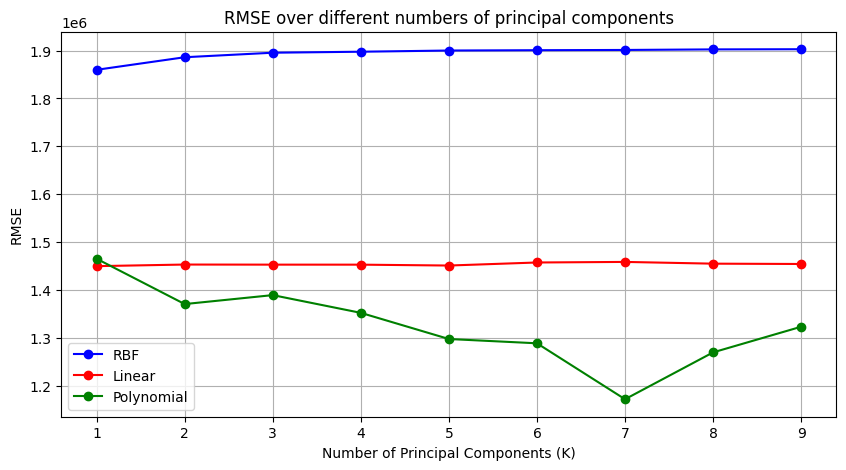

In [139]:
rmse_rbf_list = []
rmse_lin_list = []
rmse_poly_list = []

for k in range(1, 10):
    print(f"\nFor {k} PCA components:")
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)

    # Fit model
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=1)
    svr_lin = SVR(kernel='linear', C=1e3, gamma=1)
    svr_poly = SVR(kernel='poly', C=1e3, gamma=1, degree=3)
    y_rbf = svr_rbf.fit(X_train_pca, y_train).predict(X_val_pca)
    y_lin = svr_lin.fit(X_train_pca, y_train).predict(X_val_pca)
    y_poly = svr_poly.fit(X_train_pca, y_train).predict(X_val_pca)

    # Store RMSE
    rmse_rbf = np.sqrt(mean_squared_error(y_val, y_rbf))
    rmse_lin = np.sqrt(mean_squared_error(y_val, y_lin))
    rmse_poly = np.sqrt(mean_squared_error(y_val, y_poly))
    rmse_rbf_list.append(rmse_rbf)
    rmse_lin_list.append(rmse_lin)
    rmse_poly_list.append(rmse_poly)

    # Show results
    print("RMSE for RBF:", rmse_rbf)
    print("RMSE for Linear:", rmse_lin)
    print("RMSE for Polynomial:", rmse_poly)

# Graph RMSE
plt.figure(figsize=(10, 5))
plt.plot(range(1, 10), rmse_rbf_list, marker='o', linestyle='-', color='b', label='RBF')
plt.plot(range(1, 10), rmse_lin_list, marker='o', linestyle='-', color='r', label='Linear')
plt.plot(range(1, 10), rmse_poly_list, marker='o', linestyle='-', color='g', label='Polynomial')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('RMSE')
plt.title('RMSE over different numbers of principal components')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
# Define models
svr = SVR()
pca = PCA()
pipeline = make_pipeline(pca, svr)

# Define parameters
param_grid = {
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'svr__C': [0.1, 1, 10, 100, 1000],
    'svr__gamma': [0.001, 0.01, 0.1, 1],
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__degree': [2, 3, 4]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print("Best parameters found: ", best_params)
print("Best model RMSE: ", rmse)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
Best parameters found:  {'pca__n_components': 6, 'svr__C': 1000, 'svr__degree': 3, 'svr__gamma': 1, 'svr__kernel': 'poly'}
Best model RMSE:  1288468.1734965092


# **Problem 2: Best result**

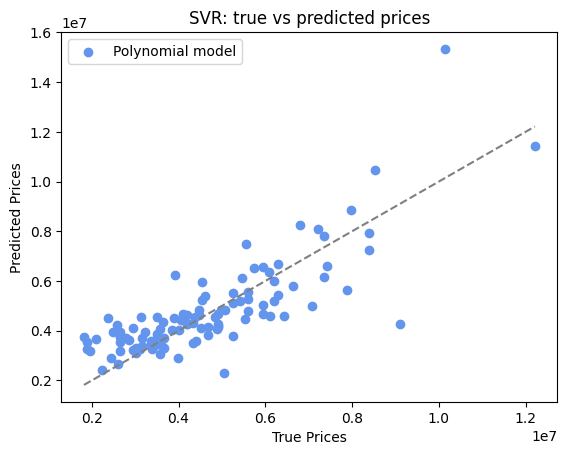

RMSE for Polynomial: 1171643.7841916198


In [141]:
pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

# Fit regression model
svr_poly = SVR(kernel='poly', C=1e3, gamma=1, degree=3)
y_poly = svr_poly.fit(X_train_pca, y_train).predict(X_val_pca)

# Show results
plt.scatter(y_val, y_poly, color='cornflowerblue', label='Polynomial model')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='gray')  # Perfect prediction
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('SVR: true vs predicted prices')
plt.legend()
plt.show()

print("RMSE for Polynomial:", np.sqrt(mean_squared_error(y_val, y_poly)))